In [3]:
# Cell A: install required packages & imports (run once)
# Run this cell first in Colab.

# install packages (silent)
!pip install -q psutil matplotlib numpy

# Imports
import time, gc, copy
import matplotlib.pyplot as plt
import numpy as np
import psutil
%matplotlib inline

# helper: measure time + memory (using psutil)
def measure_time_and_memory(func, args=(), kwargs=None):
    """Return (result, time_seconds, memory_MB_change)."""
    if kwargs is None: kwargs = {}
    gc.collect()
    process = psutil.Process()
    mem_before = process.memory_info().rss / (1024*1024)  # MB
    t0 = time.time()
    result = func(*args, **kwargs)
    t1 = time.time()
    gc.collect()
    mem_after = process.memory_info().rss / (1024*1024)   # MB
    return result, (t1 - t0), (mem_after - mem_before)

# set seed
np.random.seed(42)
print("Setup done. Run cells 1..4 next.")


Setup done. Run cells 1..4 next.


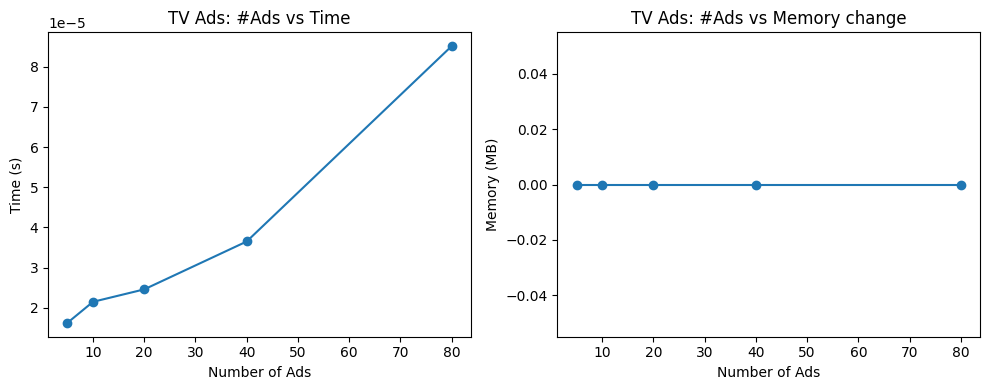

Example scheduled slots: ['C', 'A', 'E']
Example total profit: 142

Complexity: Sorting O(n log n) + scheduling O(n * d) worst; Space O(n + d).


In [4]:
# Cell 1: TV Commercial Scheduling (Greedy - Job Sequencing)
# Paste and run after Cell A.

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

def job_sequencing(jobs):
    """
    jobs: list of tuples (id, deadline (int >=1), profit)
    returns: (scheduled_job_ids_list, total_profit)
    """
    if not jobs:
        return [], 0
    jobs_sorted = sorted(jobs, key=lambda x: x[2], reverse=True)
    max_deadline = max(job[1] for job in jobs_sorted)
    slots = [-1] * (max_deadline + 1)  # index 0 unused
    total_profit = 0
    for job_id, deadline, profit in jobs_sorted:
        for d in range(min(deadline, max_deadline), 0, -1):
            if slots[d] == -1:
                slots[d] = job_id
                total_profit += profit
                break
    scheduled = [s for s in slots[1:] if s != -1]
    return scheduled, total_profit

def profile_job_sequencing(sizes=[5,10,20,40,80]):
    times = []; mems = []
    for n in sizes:
        jobs = [('J'+str(i), np.random.randint(1, max(2, n//2)+1), np.random.randint(1,100)) for i in range(n)]
        # use deepcopy to avoid side-effects
        _, t, m = measure_time_and_memory(job_sequencing, args=(deepcopy(jobs),))
        times.append(t); mems.append(m)
    return sizes, times, mems

# Run profiling and plot
sizes, times, mems = profile_job_sequencing()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(sizes, times, marker='o')
plt.title("TV Ads: #Ads vs Time")
plt.xlabel("Number of Ads"); plt.ylabel("Time (s)")
plt.subplot(1,2,2)
plt.plot(sizes, mems, marker='o')
plt.title("TV Ads: #Ads vs Memory change")
plt.xlabel("Number of Ads"); plt.ylabel("Memory (MB)")
plt.tight_layout(); plt.show()

# Example
jobs_example = [('A',2,100),('B',1,19),('C',2,27),('D',1,25),('E',3,15)]
scheduled, profit = job_sequencing(jobs_example)
print("Example scheduled slots:", scheduled)
print("Example total profit:", profit)
print("\nComplexity: Sorting O(n log n) + scheduling O(n * d) worst; Space O(n + d).")
